In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('macro_data.csv')
df

,Mnemonic,M_FHOFHOPIPOQ.IUSA,M_FYLE.IUSA,M_FRT.IUSA,M_FYPSAVQ.IUSA,M_FC.IUSA,FYPCPICA_FEDB.IUSA,M_FGDP.IUSA,M_FYHHAVGQ.IUSA,M_FYFMMEDQ.IUSA,...,M_FBCFCOFCCQ.IUSA,M_FETP.IUSA,M_FLTV.IUSA,M_FC$.IUSA,M_FEIAMGTTQ.IUSA,M_FXCPMGASUQ.IUSA,M_FRBBBQ.IUSA,M_FHOWNRQ.IUSA,M_FIFR_FEDS.IUSA,M_FIFR$_FEDS.IUSA
0,Description,Baseline Scenario (October 2022): FHFA Purchas...,Baseline Scenario (October 2022): NIPA: Income...,Baseline Scenario (October 2022): Retail Sales...,Baseline Scenario (October 2022): Income: Pers...,Baseline Scenario (October 2022): NIPA: Person...,Baseline Scenario (October 2022): Income: Per ...,Baseline Scenario (October 2022): NIPA: Gross ...,Baseline Scenario (October 2022): Average Hous...,Baseline Scenario (October 2022): Median Famil...,...,Baseline Scenario (June 2020): Charge Off Rate...,Baseline Scenario (June 2020): Employment: Tot...,Baseline Scenario (June 2020): Terms Conventio...,Baseline Scenario (June 2020): NIPA: Personal ...,Baseline Scenario (June 2020): U.S. All Grades...,Baseline Scenario (June 2020): Motor gasoline ...,Baseline Scenario (June 2020): Merrill Lynch 1...,Baseline Scenario (June 2020): Homeownership R...,FRB CCAR 2020 - Severely Adverse: NIPA: Fixed ...,FRB CCAR 2020 - Severely Adverse: NIPA: Fixed ...
1,Name,"FHFA Purchase-Only Home Price Index, (Index 19...","NIPA: Income - Compensation of Employees, (Bil...","Retail Sales - Retail Sales Total, (Bil. USD, ...","Income: Personal - Saving Rate, (%, SA)",NIPA: Personal Consumption Expenditures - Tota...,"Income: Per Capita Income, (USD)","NIPA: Gross Domestic Product, (Bil. USD, SAAR)","Average Household Income: All Races, (USD, SA)","Median Family Income: All Races, (USD, SA)",...,Charge Off Rates: All Commercial Banks - Credi...,"Employment: Total Private, (Mil. #, SA)",Terms Conventional Mortgages: All Loans - Comp...,NIPA: Personal Consumption Expenditures - Tota...,U.S. All Grades All Formulations Retail Gasoli...,"Motor gasoline prices: Unleaded, (Cents per ga...","Merrill Lynch 10-Year Bbb Corporate Bond Rate,...","Homeownership Rate, (%, SA)","NIPA: Fixed Investment - Residential - Total, ...","NIPA: Fixed Investment - Residential - Total, ..."
2,Source,U.S. Federal Housing Finance Agency (FHFA); Fr...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Census Bureau (BOC); Moody's Analytics Fo...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Census Bureau (BOC); U.S. Bureau of Econo...,U.S. Census Bureau (BOC); Moody's Analytics Fo...,...,U.S. Board of Governors of the Federal Reserve...,U.S. Bureau of Labor Statistics (BLS); Moody's...,U.S. Federal Housing Finance Board (FHFB); Moo...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Energy Information Administration (EIA); ...,Oil Price Information Service (OPIS); Moody's ...,U.S. Board of Governors of the Federal Reserve...,U.S. Census Bureau (BOC); Moody's Analytics Fo...,U.S. Bureau of Economic Analysis (BEA); Moody'...,U.S. Bureau of Economic Analysis (BEA); Moody'...
3,Native Frequency,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,ANNUAL,MONTHLY,MONTHLY,MONTHLY,...,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY,MONTHLY
4,Geography,United States,United States,United States,United States,United States,United States,United States,United States,United States,...,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,8/31/2035,517.343026,24477.50421,10683.55223,5.850066485,30258.36203,109631.1675,44455.57687,272055.4718,138308.4502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,9/30/2035,518.9847037,24562.9831,10715.48389,5.856203152,30357.61418,109972.5749,44603.62923,272841.9069,138661.205,...,NaN,NaN,NaN,NaN,NaN,NaN

In [63]:
df_income_per_capita = df[['Mnemonic', 'FYPCPICA_FEDB.IUSA']].drop(index=df.index[:7],inplace=False)
df_income_per_capita['year'] = df_income_per_capita['Mnemonic'].str[-4:]
df_income_per_capita['year'] = pd.to_numeric(df_income_per_capita['year'])
df_income_per_capita['FYPCPICA_FEDB.IUSA'] = pd.to_numeric(df_income_per_capita['FYPCPICA_FEDB.IUSA'])
df_income_per_capita.head()

,Mnemonic,FYPCPICA_FEDB.IUSA,year
7,1/31/2000,29747.16297,2000
8,2/29/2000,29943.16651,2000
9,3/31/2000,30136.36473,2000
10,4/30/2000,30326.88986,2000
11,5/31/2000,30508.25037,2000


In [64]:
#Take the mean of all the data points for each year
income_per_capita_gb = df_income_per_capita.groupby("year").agg("mean").reset_index()
income_per_capita_gb

C:\Users\rohan\AppData\Local\Temp\ipykernel_21784\2390500357.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income_per_capita_gb = df_income_per_capita.groupby("year").agg("mean").reset_index()


,year,FYPCPICA_FEDB.IUSA
0,2000,30674.962635
1,2001,31626.649194
2,2002,31849.546647
3,2003,32738.365511
4,2004,34301.843310
5,2005,35881.859833
6,2006,38150.479145
7,2007,39903.365897
8,2008,41032.621616
9,2009,39381.475272


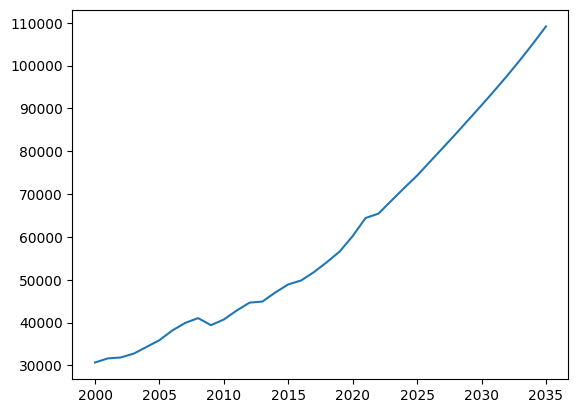

In [65]:
plt.plot(income_per_capita_gb['year'], income_per_capita_gb['FYPCPICA_FEDB.IUSA'])

In [66]:
df_gdp = df[['Mnemonic', 'M_FGDP.IUSA']].drop(index=df.index[:7],inplace=False)
df_gdp['year'] = df_gdp['Mnemonic'].str[-4:]
df_gdp

# df_gdp['year'] = pd.to_numeric(df_gdp['year'])
# df_gdp['M_FGDP.IUSA'] = pd.to_numeric(df_gdp['M_FGDP.IUSA'])
# gdp_gb = df_gdp.groupby("year").agg("mean").reset_index()
# gdp_gb
# plt.plot(gdp_gb['year'], gdp_gb['M_FGDP.IUSA'])

,Mnemonic,M_FGDP.IUSA,year
7,1/31/2000,9914.297967,2000
8,2/29/2000,9989.058091,2000
9,3/31/2000,10103.18366,2000
10,4/30/2000,10177.38722,2000
11,5/31/2000,10265.08809,2000
...,...,...,...
434,8/31/2035,44455.57687,2035
435,9/30/2035,44603.62923,2035
436,10/31/2035,44752.64789,2035
437,11/30/2035,44902.08578,2035


In [67]:
df_gdp

,Mnemonic,M_FGDP.IUSA,year
7,1/31/2000,9914.297967,2000
8,2/29/2000,9989.058091,2000
9,3/31/2000,10103.18366,2000
10,4/30/2000,10177.38722,2000
11,5/31/2000,10265.08809,2000
...,...,...,...
434,8/31/2035,44455.57687,2035
435,9/30/2035,44603.62923,2035
436,10/31/2035,44752.64789,2035
437,11/30/2035,44902.08578,2035


In [68]:
df_gdp[(df_gdp['year'] == "2018") |(df_gdp['year'] == "2019")]
month = df_gdp['Mnemonic'].str.split("/", n=2, expand=True)
df_gdp["month"] = month[0]
df_gdp

,Mnemonic,M_FGDP.IUSA,year,month
7,1/31/2000,9914.297967,2000,1
8,2/29/2000,9989.058091,2000,2
9,3/31/2000,10103.18366,2000,3
10,4/30/2000,10177.38722,2000,4
11,5/31/2000,10265.08809,2000,5
...,...,...,...,...
434,8/31/2035,44455.57687,2035,8
435,9/30/2035,44603.62923,2035,9
436,10/31/2035,44752.64789,2035,10
437,11/30/2035,44902.08578,2035,11
